<a href="https://colab.research.google.com/github/BNTiyan/job_prep_code/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal weights (w): [[0.24991703]]
Optimal bias (b): 0.00012710400339757547
Predicted price for a 2100 sq. ft. house: $524.83K


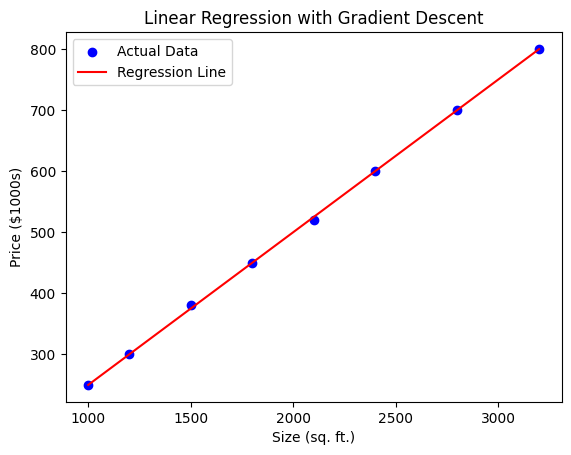

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset (from previous prompt)
X = np.array([1000, 1200, 1500, 1800, 2100, 2400, 2800, 3200])
y = np.array([250, 300, 380, 450, 520, 600, 700, 800])
m = len(y) # Number of training examples

# Reshape X to be a column vector
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# 2. Hyperparameters
learning_rate = 0.0000001 # A small learning rate is crucial for large inputs
n_iterations = 1000

# 3. Initialization
w = np.zeros((X.shape[1], 1)) # Weights
b = 0 # Bias

# 4. Gradient Descent function
def gradient_descent_linear(X, y, w, b, learning_rate, n_iterations):
    cost_history = []
    for _ in range(n_iterations):
        # Calculate prediction (hypothesis)
        y_pred = np.dot(X, w) + b

        # Calculate gradients
        # The partial derivative of J w.r.t w
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        # The partial derivative of J w.r.t b
        db = (1/m) * np.sum(y_pred - y)

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Calculate and store cost (optional)
        cost = (1/(2*m)) * np.sum(np.square(y_pred - y))
        cost_history.append(cost)

    return w, b, cost_history

# Run gradient descent
final_w, final_b, cost_history = gradient_descent_linear(X, y, w, b, learning_rate, n_iterations)

print(f"Optimal weights (w): {final_w}")
print(f"Optimal bias (b): {final_b}")

# Make a prediction for a new house (2100 sq. ft.)
new_house_size = 2100
predicted_price = final_w * new_house_size + final_b
print(f"Predicted price for a {new_house_size} sq. ft. house: ${predicted_price[0][0]:.2f}K")

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, np.dot(X, final_w) + final_b, color='red', label='Regression Line')
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()


Optimal weights: [[ 0.3057951 ]
 [ 3.39381147]
 [-2.03396559]]
Probability of malignancy for new tumor: 0.8419
Diagnosis: Malignant


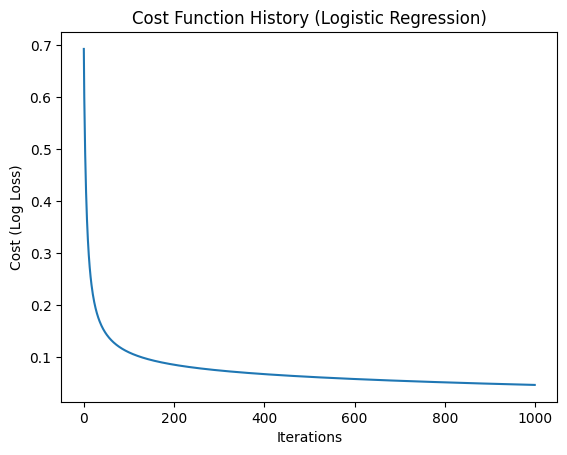

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset (from previous prompt)
# X: Tumor size (X1), Texture score (X2)
# y: Diagnosis (1 for malignant, 0 for benign)
X = np.array([
    [1.2, 5.5], [1.5, 6.1], [2.0, 7.5], [2.2, 8.1], [2.5, 5.0],
    [3.0, 4.5], [3.5, 3.0], [4.0, 2.5], [4.2, 2.0], [4.5, 1.5]
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
m = len(y) # Number of training examples

# Reshape y to be a column vector
y = y.reshape(-1, 1)

# 2. Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# 3. Initialization
# Add a bias term to X (hstack adds a column of ones for the bias/intercept)
X = np.hstack((np.ones((m, 1)), X))
n_features = X.shape[1] # Now 3 features including bias term
weights = np.zeros((n_features, 1))

# 4. Logistic Regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, weights, learning_rate, n_iterations):
    cost_history = []
    for _ in range(n_iterations):
        # Calculate linear output (z)
        z = np.dot(X, weights)
        # Apply sigmoid function to get predictions (y_pred)
        y_pred = sigmoid(z)

        # Calculate gradients
        # The partial derivative of J w.r.t weights (vectorized)
        dw = (1/m) * np.dot(X.T, (y_pred - y))

        # Update parameters
        weights = weights - learning_rate * dw

        # Calculate and store cost (optional)
        # Use a small epsilon to avoid log(0)
        epsilon = 1e-9
        cost = (-1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        cost_history.append(cost)

    return weights, cost_history

# Run gradient descent
final_weights, cost_history = gradient_descent_logistic(X, y, weights, learning_rate, n_iterations)

print(f"Optimal weights: {final_weights}")

# Make a prediction for a new tumor (size 2.8, texture 4.0)
new_tumor_features = np.array([1, 2.8, 4.0]) # Prepend 1 for the bias
prediction_prob = sigmoid(np.dot(new_tumor_features, final_weights))
print(f"Probability of malignancy for new tumor: {prediction_prob[0]:.4f}")

# Function to classify based on threshold (0.5)
def classify(prob):
    return 1 if prob >= 0.5 else 0

diagnosis = classify(prediction_prob[0])
print(f"Diagnosis: {'Malignant' if diagnosis == 1 else 'Benign'}")

# Plotting the cost history
plt.plot(cost_history)
plt.title("Cost Function History (Logistic Regression)")
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.show()


--- Standard Linear Regression ---
Train R^2 score: 0.61
Test R^2 score: 0.60
Number of non-zero coefficients: 8

--- L2 Regularization (Ridge) ---
Train R^2 score: 0.61
Test R^2 score: 0.60
Number of non-zero coefficients: 8

--- L1 Regularization (Lasso) ---
Train R^2 score: 0.61
Test R^2 score: 0.60
Number of non-zero coefficients: 7


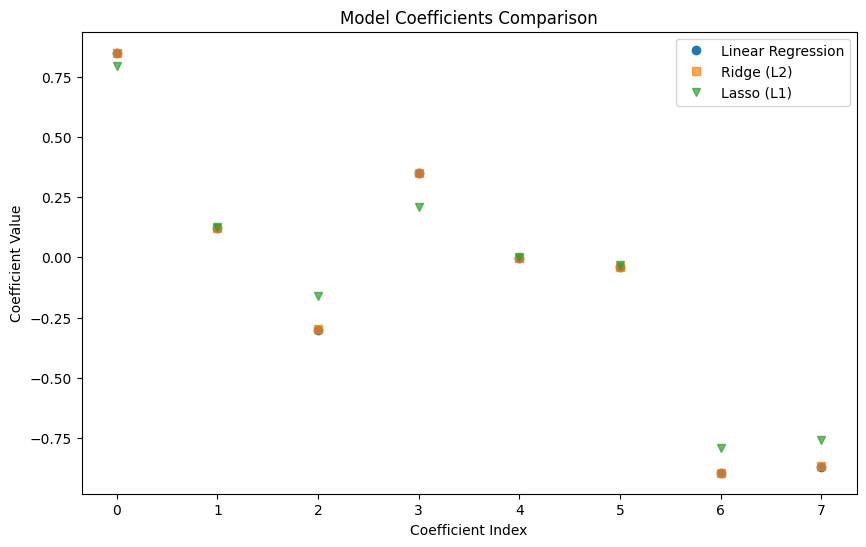

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# 1. Load and prepare a dataset
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for regularization methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Implement the models

# --- No Regularization (Standard Linear Regression) ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
print("--- Standard Linear Regression ---")
print(f"Train R^2 score: {linear_model.score(X_train_scaled, y_train):.2f}")
print(f"Test R^2 score: {linear_model.score(X_test_scaled, y_test):.2f}")
print(f"Number of non-zero coefficients: {np.sum(linear_model.coef_ != 0)}\n")

# --- L2 Regularization (Ridge Regression) ---
# alpha = 1.0 is the default value; larger alpha means stronger regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
print("--- L2 Regularization (Ridge) ---")
print(f"Train R^2 score: {ridge_model.score(X_train_scaled, y_train):.2f}")
print(f"Test R^2 score: {ridge_model.score(X_test_scaled, y_test):.2f}")
# Ridge shrinks coefficients toward zero but rarely exactly to zero
print(f"Number of non-zero coefficients: {np.sum(ridge_model.coef_ != 0)}\n")

# --- L1 Regularization (Lasso Regression) ---
# alpha = 0.01 is used here for a visible effect; play with values
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
print("--- L1 Regularization (Lasso) ---")
print(f"Train R^2 score: {lasso_model.score(X_train_scaled, y_train):.2f}")
print(f"Test R^2 score: {lasso_model.score(X_test_scaled, y_test):.2f}")
# Lasso forces some coefficients exactly to zero, performing feature selection
print(f"Number of non-zero coefficients: {np.sum(lasso_model.coef_ != 0)}")

# 3. Visualize the coefficients to see the effect
plt.figure(figsize=(10, 6))
plt.plot(linear_model.coef_, 'o', label='Linear Regression')
plt.plot(ridge_model.coef_, 's', label='Ridge (L2)', alpha=0.7)
plt.plot(lasso_model.coef_, 'v', label='Lasso (L1)', alpha=0.7)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Model Coefficients Comparison')
plt.legend()
plt.show()
